## Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Drop Outliers

C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

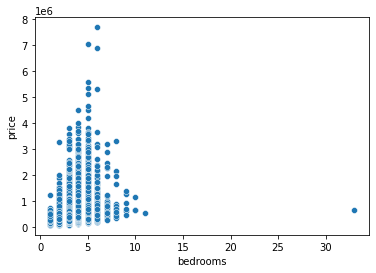

In [5]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [6]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
# drop it from our dataset because it makes no sense 
# to have 33 bedrooms and 1.75 bathrooms
df=df.drop(15856)

In [8]:
# check to see if we droped the right one
df.describe()
#we dropped the right one because max bedrooms is 11 now

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

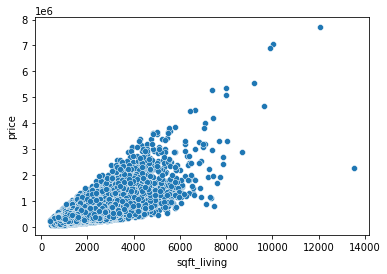

In [9]:
sns.scatterplot(df['sqft_living'],df['price'])

In [10]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

,12764
id,1225069038
date,5/5/2014
price,2.28e+06
bedrooms,7
bathrooms,8
sqft_living,13540
sqft_lot,307752
floors,3
waterfront,NO
view,EXCELLENT


In [11]:
# this one looks very far off so we are going to drop it
df.drop(12764)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

,7245
id,6762700020
date,10/13/2014
price,7.7e+06
bedrooms,6
bathrooms,8
sqft_living,12050
sqft_lot,27600
floors,2.5
waterfront,NO
view,GOOD


In [13]:
# View column has missing values so we are going to figure out what to do with it
df['view'].value_counts()
# None seems to indicate no views
# This looks like ordinal data so we are going to use OrdinalEncoder for it

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### Convert Categorical Data into Numeric Data

In [14]:
# convert the view column using OneHotEncoder

In [15]:
# check to see if there's null values in the column
df['view'].isna().sum()

63

In [16]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [17]:
# (1) Create a variable view_o
# extracted from df
# (double brackets due to shape expected by OHE)
view_o = df[['view']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
view_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# (3) Fit the encoder on view_o
view_ohe.fit(view_o)

# Inspect the categories of the fitted encoder
view_ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [18]:
# (4) Transform view_o using the encoder and
# assign the result to view_o_encoded
view_o_encoded = view_ohe.transform(view_o)

# Visually inspect view_o_encoded
view_o_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [19]:
# (5a) Make the transformed data into a dataframe
view_o_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_o_encoded,
    # Set the column names to the categories found by OHE
    columns=view_ohe.categories_[0],
    # Set the index to match df's index
    index=df.index
)

# Visually inspect new dataframe
view_o_encoded

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,1.0


In [20]:
# (5b) Concatenate the new dataframe with df
df = pd.concat([df, view_o_encoded], axis=1)

# Visually inspect df
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,0.0,0.0,0.0,0.0,1.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,0.0,0.0,0.0,0.0,1.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,0.0,0.0,0.0,0.0,1.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,98027,47.5345,-122.069,1410,1287,0.0,0.0,0.0,0.0,1.0


In [21]:
# convert the grade column into numeric values

In [22]:
df['grade'] = df['grade'].map(lambda x:int(x[0:2]))

In [23]:
# convert the condition column with OneHotEncoder

In [24]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [25]:
# (1) Create a variable condition_o
# extracted from df
# (double brackets due to shape expected by OHE)
condition_o = df[['condition']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
condition_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# (3) Fit the encoder on condition_o
condition_ohe.fit(condition_o)

# Inspect the categories of the fitted encoder
condition_ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [26]:
# (4) Transform condition_o using the encoder and
# assign the result to condition_o_encoded
condition_o_encoded = condition_ohe.transform(condition_o)

# Visually inspect view_o_encoded
condition_o_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
# (5a) Make the transformed data into a dataframe
condition_o_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_o_encoded,
    # Set the column names to the categories found by OHE
    columns=condition_ohe.categories_[0],
    # Set the index to match df's index
    index=df.index
)

# Visually inspect new dataframe
condition_o_encoded

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [28]:
# (5b) Concatenate the new dataframe with df
df = pd.concat([df, condition_o_encoded], axis=1)

# Visually inspect df
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# Note that the upper case columns are for views and title columns are for conditions

In [30]:
df.drop('id', axis=1, inplace=True)

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [32]:
X = df.drop('price', axis=1)
y= df['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
2358,3/25/2015,3,1.00,1040,8122,1.0,NO,NONE,Very Good,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6405,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
937,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
19076,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15201,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,7,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21576,4/16/2015,3,2.25,1190,1200,3.0,NO,NONE,Average,8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5390,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,5,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
